In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\python\\Adulit_census_Income_analysis\\adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Removing the useless columns that do not add any value to my analysis

In [5]:
df.drop(columns=["fnlwgt","education","capital.gain","capital.loss"],inplace=True)

In [6]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,10,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [7]:
# Renaming the columns

In [8]:
df.rename(columns={"education.num":"edu","marital.status":"marital","occupation":"job","hours.per.week":"hours","native.country":"country"},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           32561 non-null  int64 
 1   workclass     32561 non-null  object
 2   edu           32561 non-null  int64 
 3   marital       32561 non-null  object
 4   job           32561 non-null  object
 5   relationship  32561 non-null  object
 6   race          32561 non-null  object
 7   sex           32561 non-null  object
 8   hours         32561 non-null  int64 
 9   country       32561 non-null  object
 10  income        32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [10]:
df.isna().sum()
#There are null values but they are denoted as "?" so i have to take care of that 

age             0
workclass       0
edu             0
marital         0
job             0
relationship    0
race            0
sex             0
hours           0
country         0
income          0
dtype: int64

In [11]:
df.replace("?",pd.NA,inplace=True)

In [12]:
df.isna().sum()

age                0
workclass       1836
edu                0
marital            0
job             1843
relationship       0
race               0
sex                0
hours              0
country          583
income             0
dtype: int64

In [13]:
df.head()

,age,workclass,edu,marital,job,relationship,race,sex,hours,country,income
0,90,<NA>,9,Widowed,<NA>,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,<NA>,10,Widowed,<NA>,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [14]:
df.shape

(32561, 11)

In [15]:
# There are more than 30k rows of data so i can drop the null values although i can fill them with mode form there respective columns
# but i think that will make the data incorrect 

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

age             0
workclass       0
edu             0
marital         0
job             0
relationship    0
race            0
sex             0
hours           0
country         0
income          0
dtype: int64

In [18]:
df.shape

(30162, 11)

In [19]:
df.head()

,age,workclass,edu,marital,job,relationship,race,sex,hours,country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


<Axes: ylabel='Density'>

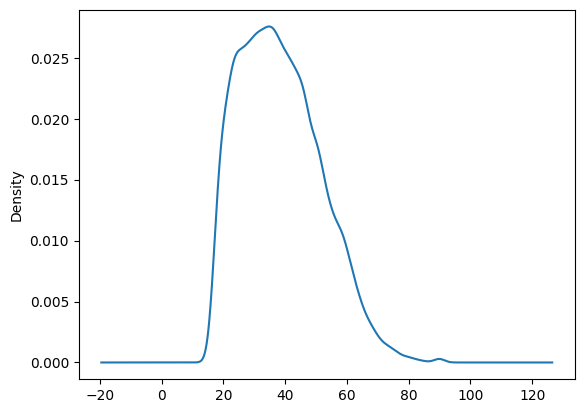

In [20]:
df["age"].plot(kind="kde")

<Axes: xlabel='workclass'>

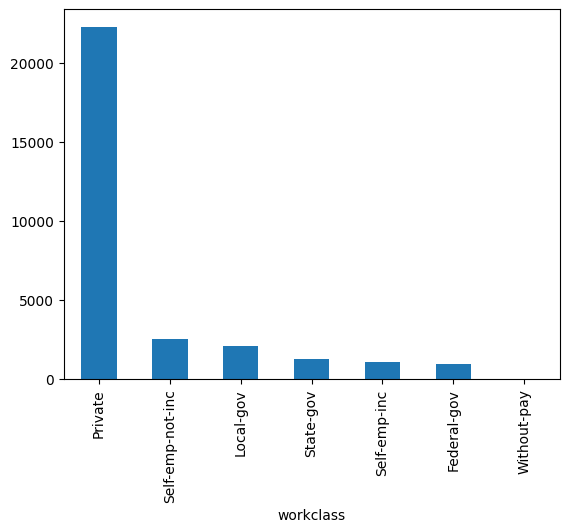

In [21]:
df["workclass"].value_counts().plot(kind="bar")
# Most of the people have private jobs 
# there is a catogery with "without-pay" they must be the unpaid interns haha
# i will drop them as they do not contribute any income 

In [22]:
df["workclass"].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [23]:
df = df[df["workclass"] != 'Without-pay']

<Axes: xlabel='workclass'>

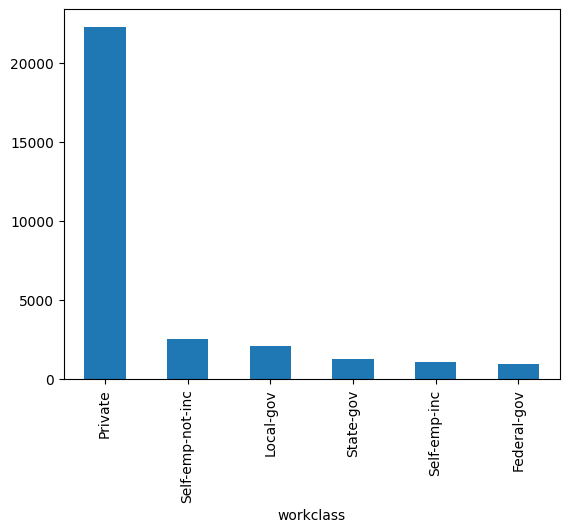

In [24]:
df["workclass"].value_counts().plot(kind="bar")
# This looks better i feel sorry for thos unpaid interns 

In [25]:
df.head()

,age,workclass,edu,marital,job,relationship,race,sex,hours,country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


<Axes: xlabel='edu'>

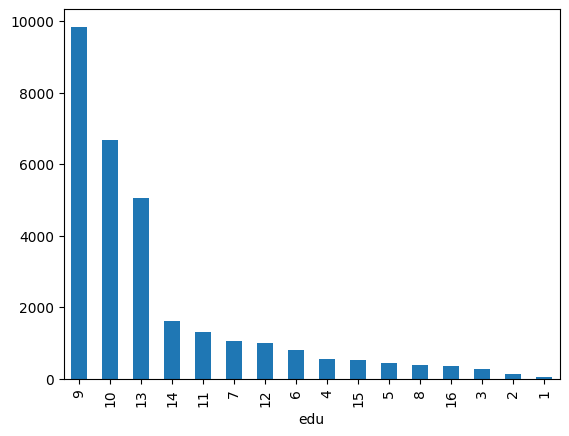

In [26]:
df["edu"].value_counts().plot(kind="bar")
# Most of the people have HS-grade of education there are few with no education also that is denoted by 1
# refer to the education column from the actual dataset to know more about the education and there coressponding values

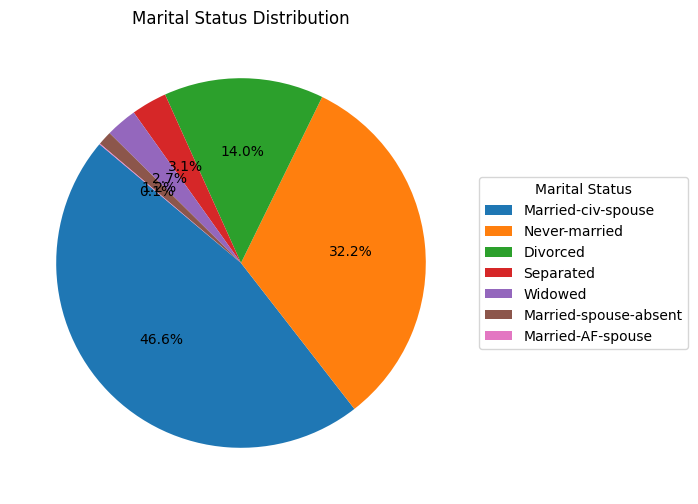

In [27]:
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(10,6))
patches, texts, _ = plt.pie(marital_counts, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.legend(patches, marital_counts.index, title="Marital Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [28]:
df["job"].value_counts()

job
Prof-specialty       4038
Craft-repair         4029
Exec-managerial      3992
Adm-clerical         3718
Sales                3584
Other-service        3211
Machine-op-inspct    1965
Transport-moving     1571
Handlers-cleaners    1349
Farming-fishing       983
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [29]:
# I think i can just use One-Hot encoding for this column as there not many Categories

<Axes: xlabel='job'>

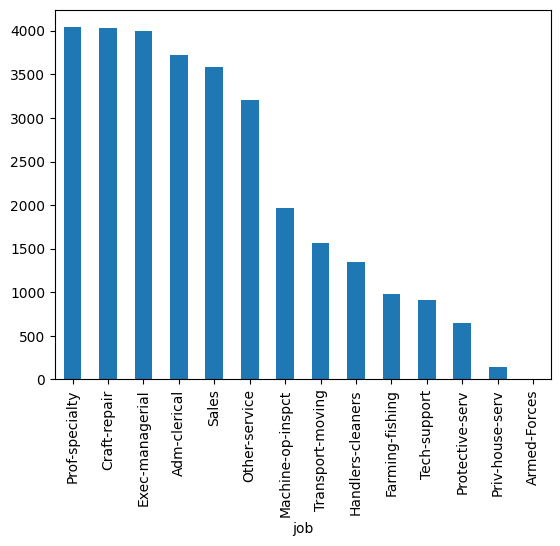

In [30]:
df.job.value_counts().plot(kind="bar")

In [31]:
df.head()

,age,workclass,edu,marital,job,relationship,race,sex,hours,country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


<Axes: xlabel='relationship'>

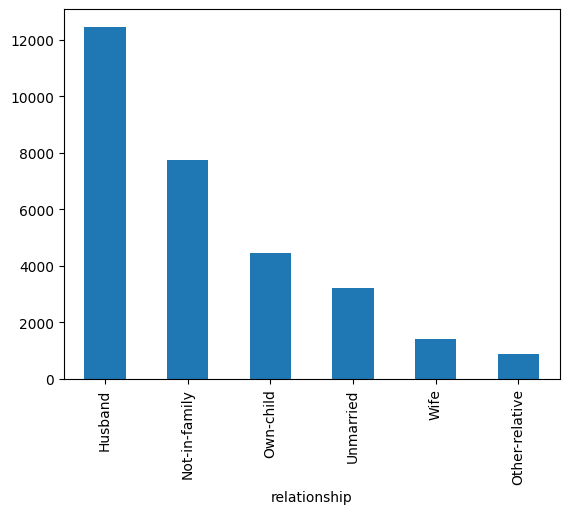

In [32]:
df["relationship"].value_counts().plot(kind="bar")

<Axes: xlabel='workclass,income'>

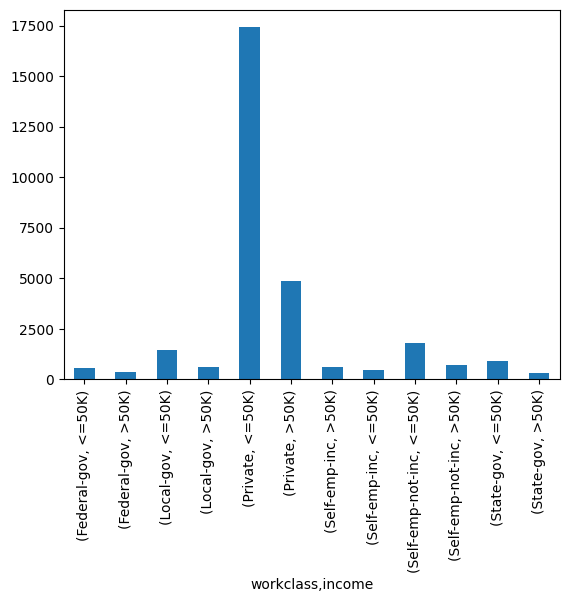

In [33]:
# Checking relationship between work class and income
df.groupby("workclass").income.value_counts().plot(kind="bar")
# Most of the people have private earn less then 50k

In [34]:
# education vs income

In [35]:
df.groupby("income").edu.mean().reset_index().sort_values(by="income")
# Those who earn more than 50k have better education so kids study hard

,income,edu
0,<=50K,9.629461
1,>50K,11.606420


In [36]:
df.head()

,age,workclass,edu,marital,job,relationship,race,sex,hours,country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


In [37]:
df["race"].value_counts()

race
White                 25921
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

<Axes: ylabel='count'>

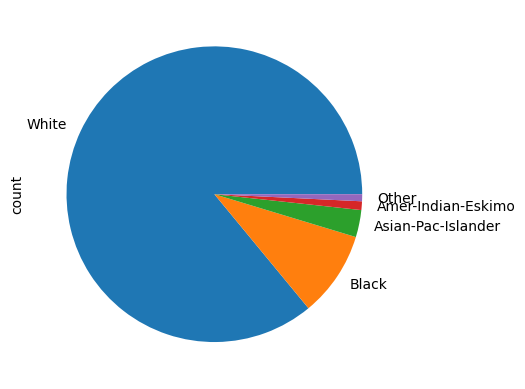

In [38]:
df.race.value_counts().plot(kind="pie")
# most of the peple are white followed by Black and Asians 

In [39]:
# Race vs marital status 

<Axes: xlabel='marital,race'>

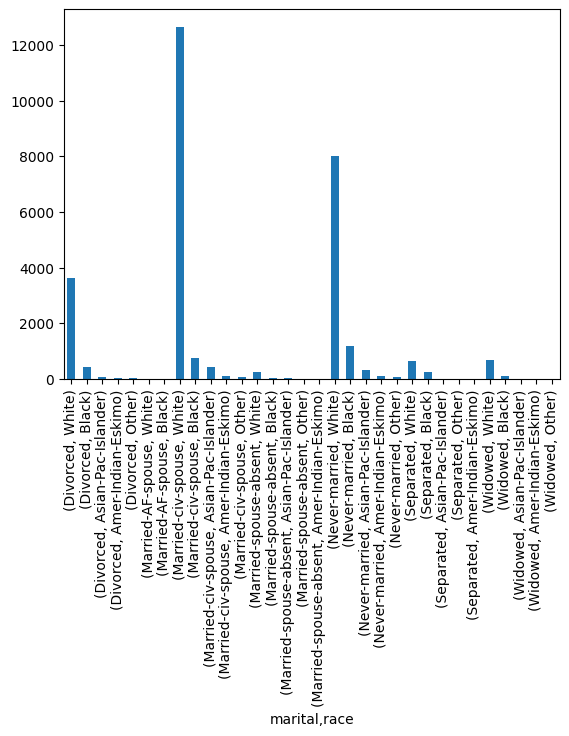

In [40]:
df.groupby("marital").race.value_counts().plot(kind="bar")

In [41]:
# Hours vs job type

In [42]:
df.groupby("job").hours.mean().reset_index().sort_values(by="hours")
# Farming and fishing workers work the most number of hours 
# private house serv type job have the least number of hours 

,job,hours
8,Priv-house-serv,32.797203
7,Other-service,34.599190
0,Adm-clerical,37.576116
5,Handlers-cleaners,37.873239
12,Tech-support,39.473684
1,Armed-Forces,40.666667
6,Machine-op-inspct,40.715013
11,Sales,40.763393
2,Craft-repair,42.298585
9,Prof-specialty,42.374938


In [43]:
df.head()

,age,workclass,edu,marital,job,relationship,race,sex,hours,country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


<Axes: xlabel='income'>

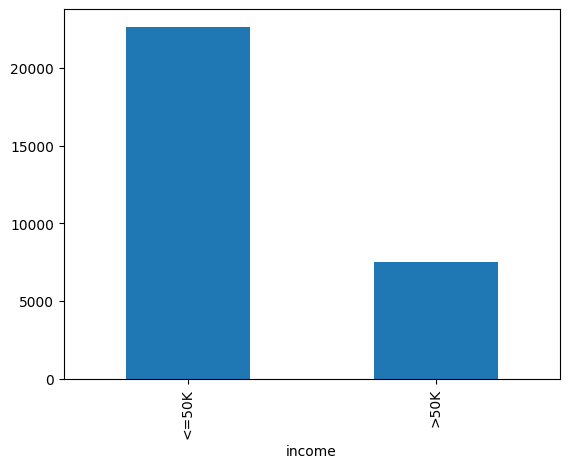

In [44]:
df.income.value_counts().plot(kind="bar")
# most of the people earn less than 50k 

In [45]:
# Model building and evaluation

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30148 entries, 1 to 32560
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           30148 non-null  int64 
 1   workclass     30148 non-null  object
 2   edu           30148 non-null  int64 
 3   marital       30148 non-null  object
 4   job           30148 non-null  object
 5   relationship  30148 non-null  object
 6   race          30148 non-null  object
 7   sex           30148 non-null  object
 8   hours         30148 non-null  int64 
 9   country       30148 non-null  object
 10  income        30148 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.8+ MB


In [47]:
df.isna().sum()

age             0
workclass       0
edu             0
marital         0
job             0
relationship    0
race            0
sex             0
hours           0
country         0
income          0
dtype: int64

In [48]:
df.head()

,age,workclass,edu,marital,job,relationship,race,sex,hours,country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


In [49]:
# Encoding

In [50]:
# work class i am using frequency encoding
location_freq = df['workclass'].value_counts(normalize=True).to_dict()
df['workclass_freq'] = df['workclass'].map(location_freq)

In [51]:
df.head()

,age,workclass,edu,marital,job,relationship,race,sex,hours,country,income,workclass_freq
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,0.73922
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K,0.73922
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K,0.73922
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K,0.73922
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K,0.73922


In [52]:
df.drop(columns=["workclass"],inplace=True)

In [53]:
# marital i am using one hot encoding as there are less number of unqiue of values 
df['marital'] = df['marital'].astype('category')
df = pd.get_dummies(df, columns=['marital'], prefix='marital')

In [54]:
df.head()

,age,edu,job,relationship,race,sex,hours,country,income,workclass_freq,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed
1,82,9,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,0.73922,False,False,False,False,False,False,True
3,54,4,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K,0.73922,True,False,False,False,False,False,False
4,41,10,Prof-specialty,Own-child,White,Female,40,United-States,<=50K,0.73922,False,False,False,False,False,True,False
5,34,9,Other-service,Unmarried,White,Female,45,United-States,<=50K,0.73922,True,False,False,False,False,False,False
6,38,6,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K,0.73922,False,False,False,False,False,True,False


In [55]:
# job -  i am using frequency encoding
location_freq = df['job'].value_counts(normalize=True).to_dict()
df['Job'] = df['job'].map(location_freq)

In [56]:
df.drop(columns=["job"],inplace=True)

In [57]:
df.head()

,age,edu,relationship,race,sex,hours,country,income,workclass_freq,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,Job
1,82,9,Not-in-family,White,Female,18,United-States,<=50K,0.73922,False,False,False,False,False,False,True,0.132413
3,54,4,Unmarried,White,Female,40,United-States,<=50K,0.73922,True,False,False,False,False,False,False,0.065178
4,41,10,Own-child,White,Female,40,United-States,<=50K,0.73922,False,False,False,False,False,True,False,0.133939
5,34,9,Unmarried,White,Female,45,United-States,<=50K,0.73922,True,False,False,False,False,False,False,0.106508
6,38,6,Unmarried,White,Male,40,United-States,<=50K,0.73922,False,False,False,False,False,True,False,0.123325


In [58]:
# relationship -  i am using one hot encoding as there are less number of unqiue of values 
df['relationship'] = df['relationship'].astype('category')
df = pd.get_dummies(df, columns=['relationship'], prefix='relationship')

In [59]:
df.head()

,age,edu,race,sex,hours,country,income,workclass_freq,marital_Divorced,marital_Married-AF-spouse,...,marital_Never-married,marital_Separated,marital_Widowed,Job,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
1,82,9,White,Female,18,United-States,<=50K,0.73922,False,False,...,False,False,True,0.132413,False,True,False,False,False,False
3,54,4,White,Female,40,United-States,<=50K,0.73922,True,False,...,False,False,False,0.065178,False,False,False,False,True,False
4,41,10,White,Female,40,United-States,<=50K,0.73922,False,False,...,False,True,False,0.133939,False,False,False,True,False,False
5,34,9,White,Female,45,United-States,<=50K,0.73922,True,False,...,False,False,False,0.106508,False,False,False,False,True,False
6,38,6,White,Male,40,United-States,<=50K,0.73922,False,False,...,False,True,False,0.123325,False,False,False,False,True,False


In [60]:
# country - i am using one hot encoding as there are less number of unqiue of values 
df['country'] = df['country'].astype('category')
df = pd.get_dummies(df, columns=['country'], prefix='country')

In [61]:
df['Income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

In [62]:
df.drop(columns=["income"],inplace=True)

In [63]:
df['race'] = df['race'].astype('category')
df = pd.get_dummies(df, columns=['race'], prefix='race')

In [64]:
df['sex'] = df['sex'].astype('category')
df = pd.get_dummies(df, columns=['sex'], prefix='sex')

In [65]:
df.head()

,age,edu,hours,workclass_freq,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,...,country_Vietnam,country_Yugoslavia,Income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
1,82,9,18,0.73922,False,False,False,False,False,False,...,False,False,0,False,False,False,False,True,True,False
3,54,4,40,0.73922,True,False,False,False,False,False,...,False,False,0,False,False,False,False,True,True,False
4,41,10,40,0.73922,False,False,False,False,False,True,...,False,False,0,False,False,False,False,True,True,False
5,34,9,45,0.73922,True,False,False,False,False,False,...,False,False,0,False,False,False,False,True,True,False
6,38,6,40,0.73922,False,False,False,False,False,True,...,False,False,0,False,False,False,False,True,False,True


In [66]:
# normalizing hours and age column using min - max scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
age_values = df['age'].values.reshape(-1, 1)
hours_values = df['hours'].values.reshape(-1, 1)
df['age_normalized'] = scaler.fit_transform(age_values)
df['hours_normalized'] = scaler.fit_transform(hours_values)

In [70]:
df.drop(columns=["age","hours"],inplace=True)

In [76]:
df["Income"]=df["Income"].astype("int")
df["edu"]=df["edu"].astype("int")

In [71]:
df.head()

,edu,workclass_freq,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,Job,...,Income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,age_normalized,hours_normalized
1,9,0.73922,False,False,False,False,False,False,True,0.132413,...,0,False,False,False,False,True,True,False,0.890411,0.173469
3,4,0.73922,True,False,False,False,False,False,False,0.065178,...,0,False,False,False,False,True,True,False,0.506849,0.397959
4,10,0.73922,False,False,False,False,False,True,False,0.133939,...,0,False,False,False,False,True,True,False,0.328767,0.397959
5,9,0.73922,True,False,False,False,False,False,False,0.106508,...,0,False,False,False,False,True,True,False,0.232877,0.448980
6,6,0.73922,False,False,False,False,False,True,False,0.123325,...,0,False,False,False,False,True,False,True,0.287671,0.397959


In [72]:
df.shape

(30148, 67)

In [80]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
X = df.drop(columns=["Income"])
y = df['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(max(y)))

# I have used GridSearchCV on my local machine and best parameters obtained from GridSearchCV are listed below
best_params = {
    'n_estimators': 300,
    'max_depth': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}

# Initialize the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Train the classifier
best_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8398009950248756

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6811
           1       0.73      0.56      0.63      2234

    accuracy                           0.84      9045
   macro avg       0.80      0.75      0.77      9045
weighted avg       0.83      0.84      0.83      9045


Confusion Matrix:
 [[6341  470]
 [ 979 1255]]


In [86]:
# The recall of 0 that is <=50 is 92% which is really good because we had more values for the 0 value 

In [87]:
# to improve this we can use SMOTE technique 